In [1]:
%matplotlib widget

from collections import defaultdict
import csv
from math import pow, sqrt
from matplotlib import pyplot as plt
import numpy as np
import os
from pathlib import Path
from scipy.fft import fft, fftfreq

### Function Definitions

In [2]:
def parse_csv(file_name: str):
    time = []
    amps = []
    with open(file_name) as csvfile:
        reader = csv.DictReader(csvfile, delimiter=",")
        for row in reader:
            time.append(int(row["Time"]))
            amps.append(sqrt(float(row["X"])**2 + float(row["Y"])**2 + float(row["Z"])**2))
    
    return np.array(time), np.array(amps)


### Constants Setup

In [3]:
DATA_PATH = Path("./data")
FOLDER_LIST = [p.name for p in os.scandir(DATA_PATH) if p.is_dir()]
TRIAL_NAMES = [
    "accelerometer_data_right_hold",
    "accelerometer_data_1right_hold",
    "accelerometer_data_2right_hold",
    "accelerometer_data_3right_hold",
    "accelerometer_data_4right_hold",
    "accelerometer_data_left_hold",
    "accelerometer_data_right_book",
    "accelerometer_data_left_book",
]

### Parse Data

In [4]:
ALLDATA = defaultdict(lambda: defaultdict(list))
ALLDATA_FFTS = defaultdict(lambda: defaultdict(list))
for person in FOLDER_LIST:
    file_list = os.listdir(DATA_PATH / person)
    for trial in TRIAL_NAMES:
        for file in file_list:
            if trial in file:
                file_path = DATA_PATH / person / file
                time, amps = parse_csv(file_path)
                ALLDATA[person][trial].append((time, amps))

for user in ALLDATA.keys():
    user_fft = []
    for trial_name in TRIAL_NAMES:
        for trial in ALLDATA[user][trial_name]:
            time, amps = trial
            resampled_range = np.arange(time[0], time[-1]+1, 1)[:500]
            interp_data = np.interp(resampled_range, xp=time, fp=amps)
            N = len(resampled_range)
            T = 1/1000
            xf = fftfreq(N, T)[:N//2]
            fft_data = fft(interp_data)
            ALLDATA_FFTS[user][trial_name].append(fft_data)


### Plot Time/Amplitude Data

Text(0.5, 1.0, 'Vibration Data')

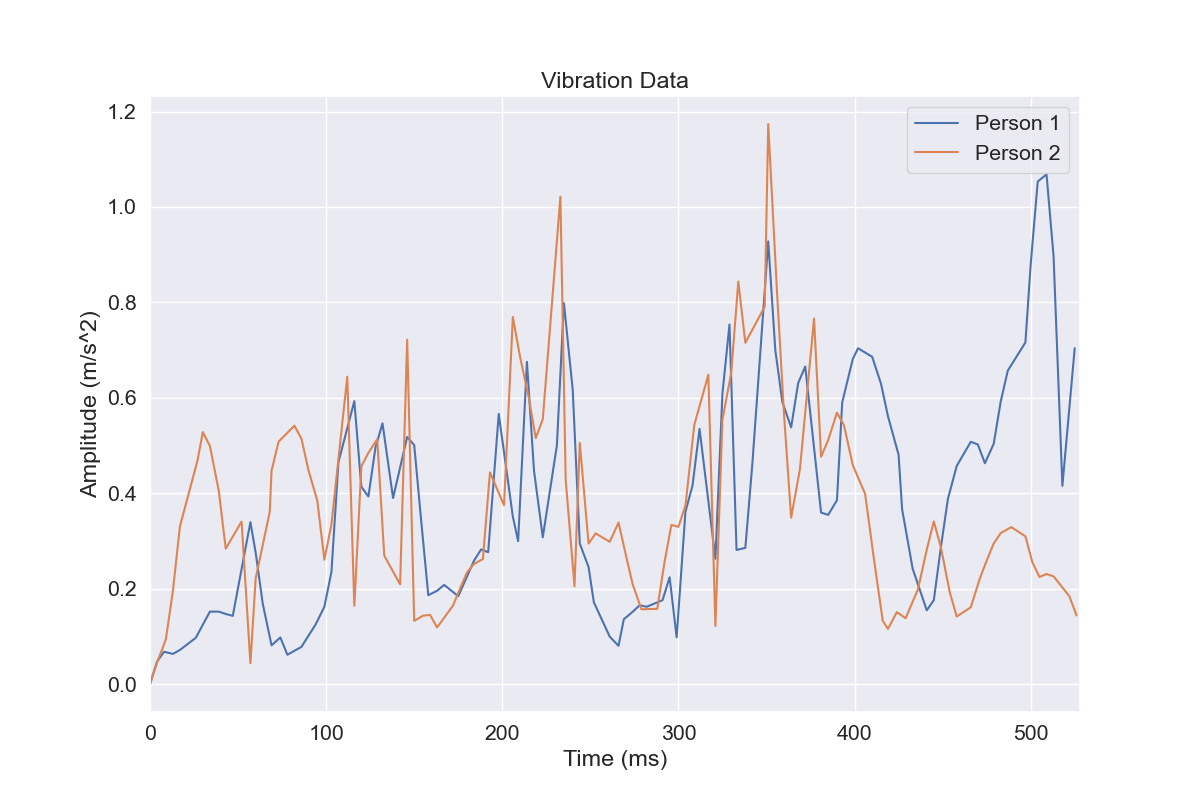

In [73]:
TRIAL_NUM = 2
plt.close()
plt.figure(figsize=(12,8))

time, amps = ALLDATA["person1"][TRIAL_NAMES[0]][TRIAL_NUM]
time = np.array(time)

plt.plot(time-time[0], amps, label="Person 1")
time, amps = ALLDATA["person2"][TRIAL_NAMES[0]][TRIAL_NUM]
time = np.array(time)
plt.plot(time-time[0], amps, label="Person 2")

plt.xlim([0, 528])
# plt.xticks(ticks=[time[0], time[-1]], labels=[0, (time[-1]-time[0])/1000])

plt.ylabel("Amplitude (m/s^2)")
plt.xlabel("Time (ms)")
plt.legend()
plt.title("Vibration Data")

(0.0, 60.0)

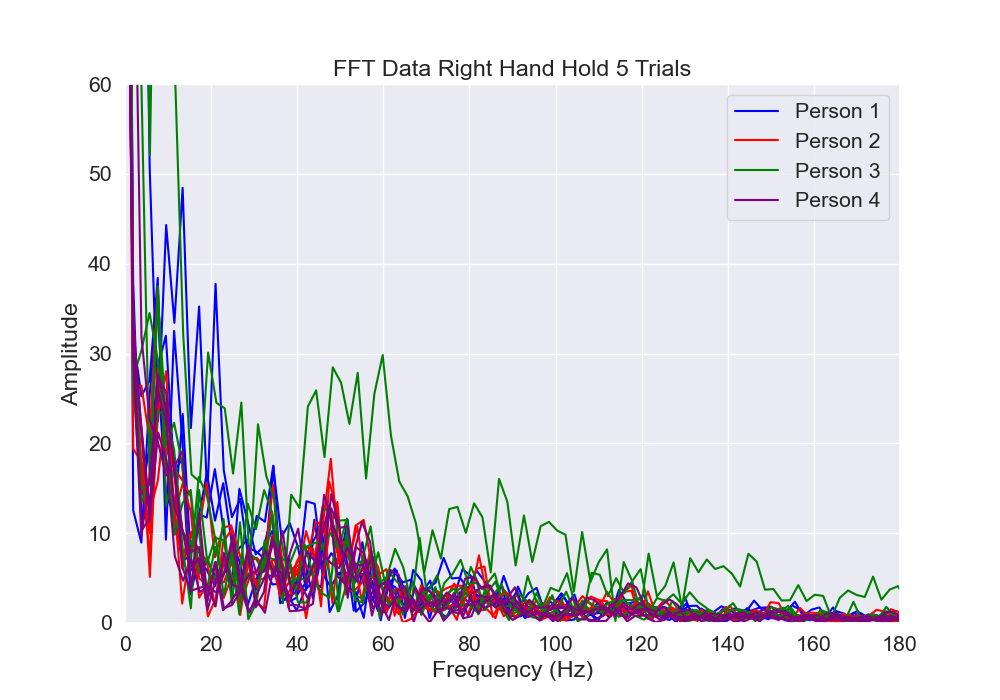

In [76]:
plt.close()
plt.figure(figsize=(10,7))
for trial in range(5):
    time, amps = ALLDATA["person1"][TRIAL_NAMES[0]][trial]

    resampled_range = np.arange(time[0], time[-1]+1, 1)
    interp_data = np.interp(resampled_range, xp=time, fp=amps)

    N = len(resampled_range)
    T = 1/1000

    xf = fftfreq(N, T)[:N//2]
    fft_data = fft(interp_data)
    plt.plot(xf, np.abs(fft_data[0:N//2]), color="blue", label="Person 1" if trial==0 else "")

for trial in range(5):
    time, amps = ALLDATA["person2"][TRIAL_NAMES[0]][trial]

    resampled_range = np.arange(time[0], time[-1]+1, 1)
    interp_data = np.interp(resampled_range, xp=time, fp=amps)

    N = len(resampled_range)
    T = 1/1000

    xf = fftfreq(N, T)[:N//2]
    fft_data = fft(interp_data)
    plt.plot(xf, np.abs(fft_data[0:N//2]), color="red", label="Person 2" if trial==0 else "")

for trial in range(5):
    time, amps = ALLDATA["person3"][TRIAL_NAMES[0]][trial]

    resampled_range = np.arange(time[0], time[-1]+1, 1)
    interp_data = np.interp(resampled_range, xp=time, fp=amps)

    N = len(resampled_range)
    T = 1/1000

    xf = fftfreq(N, T)[:N//2]
    fft_data = fft(interp_data)
    plt.plot(xf, np.abs(fft_data[0:N//2]), color="green", label="Person 3" if trial==0 else "")

for trial in range(5):
    time, amps = ALLDATA["person4"][TRIAL_NAMES[0]][trial]

    resampled_range = np.arange(time[0], time[-1]+1, 1)
    interp_data = np.interp(resampled_range, xp=time, fp=amps)

    N = len(resampled_range)
    T = 1/1000

    xf = fftfreq(N, T)[:N//2]
    fft_data = fft(interp_data)
    plt.plot(xf, np.abs(fft_data[0:N//2]), color="purple", label="Person 4" if trial==0 else "")

plt.title("FFT Data Right Hand Hold 5 Trials")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim([0, 180])
plt.ylim([0, 60])

### Confusion Matrix

In [6]:
TRIAL_NAME = "accelerometer_data_right_hold"
AVG_FFTS = {}
for user in ALLDATA.keys():
    user_fft = []
    for trial in ALLDATA[user][TRIAL_NAME]:
        time, amps = trial
        resampled_range = np.arange(time[0], time[-1]+1, 1)[:500]
        interp_data = np.interp(resampled_range, xp=time, fp=amps)
        N = len(resampled_range)
        T = 1/1000
        xf = fftfreq(N, T)[:N//2]
        fft_data = fft(interp_data)
        user_fft.append(fft_data)
    AVG_FFTS[user] = np.average(user_fft, axis=0)
    print(AVG_FFTS[user].shape)

AVG_DISTS = np.zeros((len(ALLDATA.keys()), len(ALLDATA.keys())))

for row, user1 in enumerate(ALLDATA.keys()):
    for col, user2 in enumerate(ALLDATA.keys()):
        avg_dist = np.average([np.sum(np.sqrt((np.abs(AVG_FFTS[user1])-np.abs(trial))**2)) for trial in ALLDATA_FFTS[user2][TRIAL_NAME]])
        AVG_DISTS[row][col] = avg_dist

(500,)
(500,)
(500,)
(500,)


(0.0, 60.0)

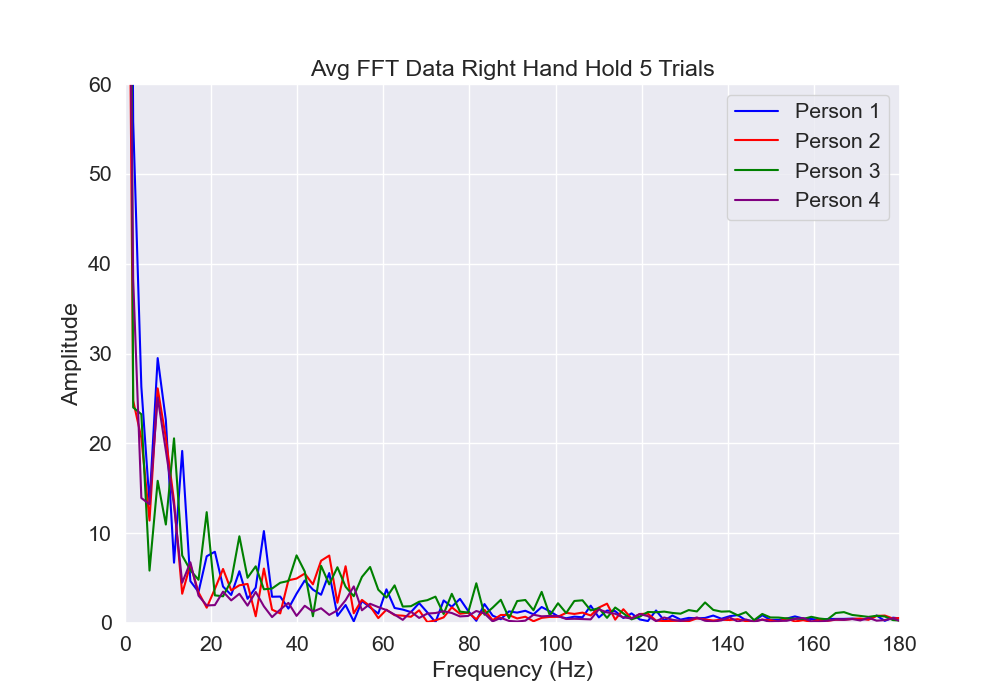

In [75]:
plt.close()
plt.figure(figsize=(10,7))

N = len(resampled_range)
T = 1/1000
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, np.abs(AVG_FFTS["person1"][0:N//2]), color="blue", label="Person 1")
plt.plot(xf, np.abs(AVG_FFTS["person2"][0:N//2]), color="red", label="Person 2")
plt.plot(xf, np.abs(AVG_FFTS["person3"][0:N//2]), color="green", label="Person 3")
plt.plot(xf, np.abs(AVG_FFTS["person4"][0:N//2]), color="purple", label="Person 4")

plt.title("Avg FFT Data Right Hand Hold 5 Trials")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim([0, 180])
plt.ylim([0, 60])

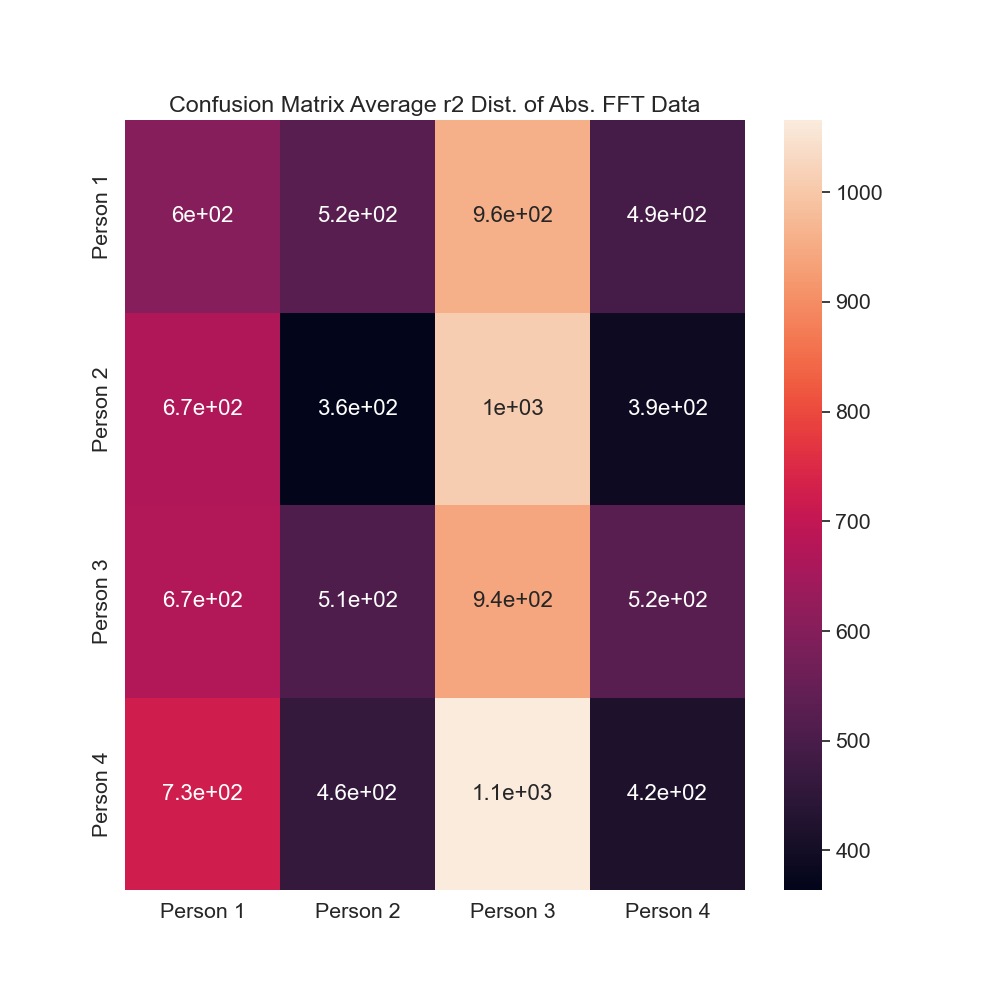

In [29]:
import seaborn as sn

plt.close()
plt.figure(figsize=(10,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(AVG_DISTS, annot=True, annot_kws={"size": 16}, xticklabels=["Person 1", "Person 2", "Person 3", "Person 4"], yticklabels=["Person 1", "Person 2", "Person 3", "Person 4"])
plt.title("Confusion Matrix Average r2 Dist. of Abs. FFT Data")
plt.show()

(0.0, 60.0)

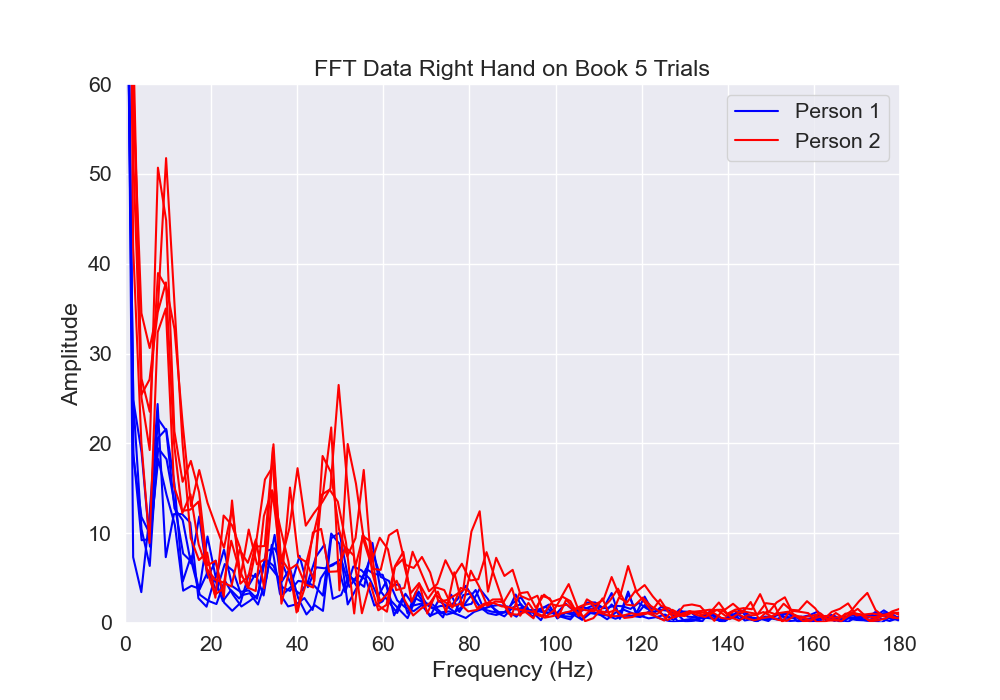

In [77]:
plt.close()
plt.figure(figsize=(10,7))
for trial in range(5):
    time, amps = ALLDATA["person1"][TRIAL_NAMES[6]][trial]

    resampled_range = np.arange(time[0], time[-1]+1, 1)
    interp_data = np.interp(resampled_range, xp=time, fp=amps)

    N = len(resampled_range)
    T = 1/1000

    xf = fftfreq(N, T)[:N//2]
    fft_data = fft(interp_data)
    plt.plot(xf, np.abs(fft_data[0:N//2]), color="blue", label="Person 1" if trial==0 else "")

for trial in range(5):
    time, amps = ALLDATA["person2"][TRIAL_NAMES[6]][trial]

    resampled_range = np.arange(time[0], time[-1]+1, 1)
    interp_data = np.interp(resampled_range, xp=time, fp=amps)

    N = len(resampled_range)
    T = 1/1000

    xf = fftfreq(N, T)[:N//2]
    fft_data = fft(interp_data)
    plt.plot(xf, np.abs(fft_data[0:N//2]), color="red", label="Person 2" if trial==0 else "")

plt.title("FFT Data Right Hand on Book 5 Trials")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim([0, 180])
plt.ylim([0, 60])

(0.0, 60.0)

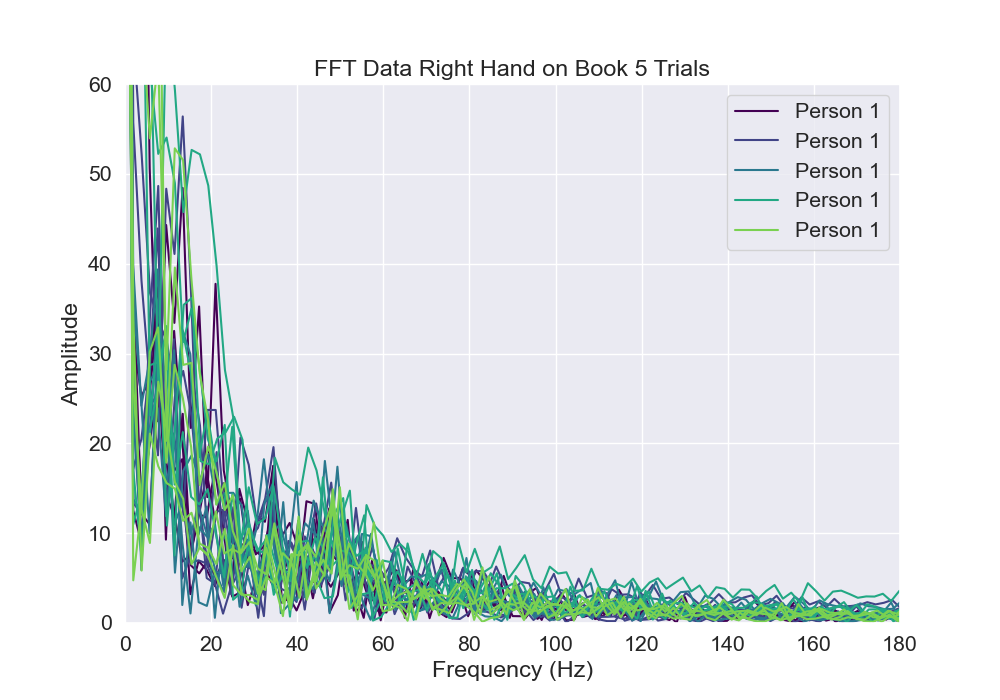

In [78]:
plt.close()
plt.figure(figsize=(10,7))

cmap = plt.get_cmap("viridis")
for idx, trial_name in enumerate([
    "accelerometer_data_right_hold",
    "accelerometer_data_1right_hold",
    "accelerometer_data_2right_hold",
    "accelerometer_data_3right_hold",
    "accelerometer_data_4right_hold",
]):
    for trial in range(5):
        time, amps = ALLDATA["person1"][trial_name][trial]

        resampled_range = np.arange(time[0], time[-1]+1, 1)
        interp_data = np.interp(resampled_range, xp=time, fp=amps)

        N = len(resampled_range)
        T = 1/1000

        xf = fftfreq(N, T)[:N//2]
        fft_data = fft(interp_data)
        plt.plot(xf, np.abs(fft_data[0:N//2]), color=cmap(idx/5), label="Person 1" if trial==0 else "")

plt.title("FFT Data Right Hand on Book 5 Trials")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim([0, 180])
plt.ylim([0, 60])

In [ ]:
ALL_AVG_FFTS = defaultdict(lambda: defaultdict())
for trial_name in TRIAL_NAMES:
    for user in ALLDATA.keys():
        user_fft = []
        for trial in ALLDATA[user][trial_name]:
            time, amps = trial
            resampled_range = np.arange(time[0], time[-1]+1, 1)[:500]
            interp_data = np.interp(resampled_range, xp=time, fp=amps)
            N = len(resampled_range)
            T = 1/1000
            xf = fftfreq(N, T)[:N//2]
            fft_data = fft(interp_data)
            user_fft.append(fft_data)
        ALL_AVG_FFTS[user][trial_name] = np.average(user_fft, axis=0)


(0.0, 60.0)

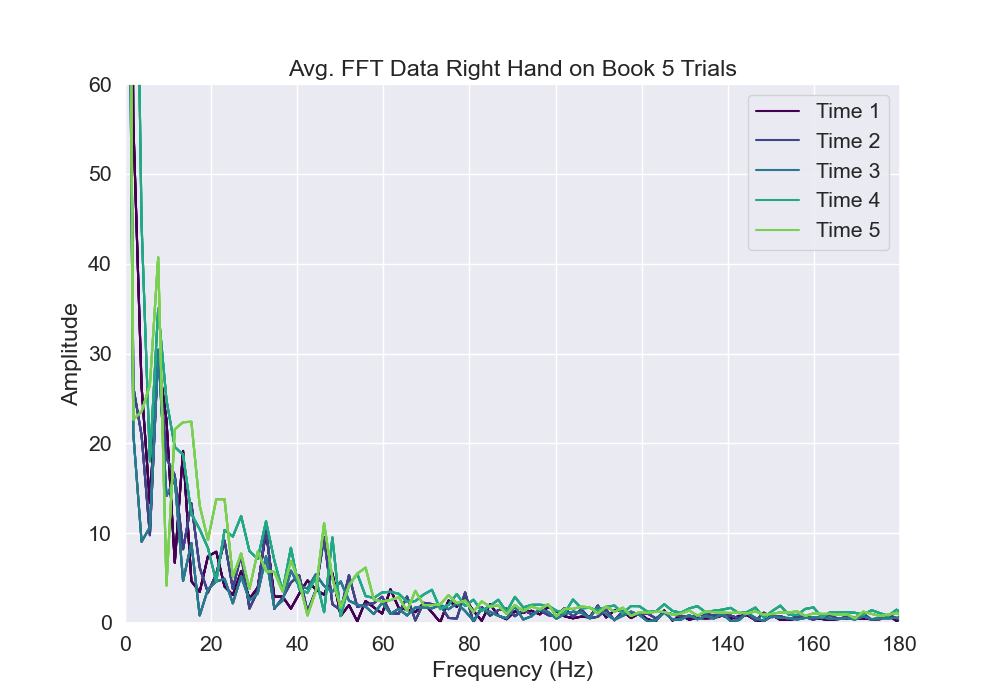

In [80]:
plt.close()
plt.figure(figsize=(10,7))

cmap = plt.get_cmap("viridis")
for idx, trial_name in enumerate([
    "accelerometer_data_right_hold",
    "accelerometer_data_1right_hold",
    "accelerometer_data_2right_hold",
    "accelerometer_data_3right_hold",
    "accelerometer_data_4right_hold",
]):
    for trial in range(5):
        avg_fft = ALL_AVG_FFTS["person1"][trial_name]

        resampled_range = np.arange(time[0], time[-1]+1, 1)
        interp_data = np.interp(resampled_range, xp=time, fp=amps)

        N = len(resampled_range)
        T = 1/1000

        xf = fftfreq(N, T)[:N//2]
        fft_data = fft(interp_data)
        plt.plot(xf, np.abs(avg_fft[0:N//2]), color=cmap(idx/5), label=f"Time {idx+1}" if trial==0 else "")

plt.title("Avg. FFT Data Right Hand on Book 5 Trials")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim([0, 180])
plt.ylim([0, 60])